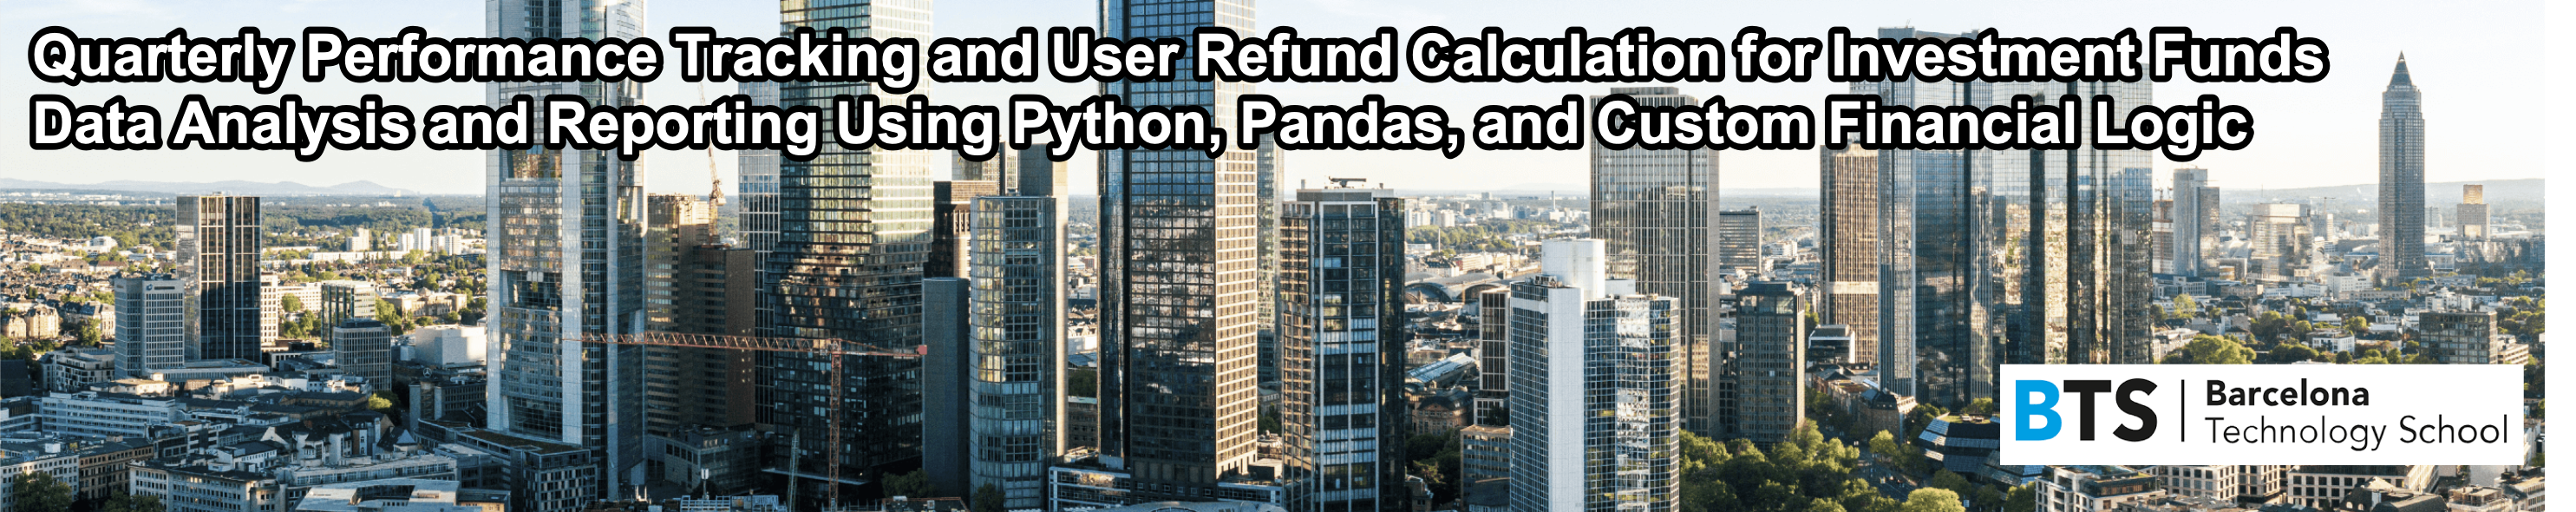

### 1. Settings, reading and preparation

In [540]:
import pandas as pd
import os

In [542]:
#Function to load all stock related information from the folder market_data
def load_market_data(folder_path):
    market_data = pd.concat(
        [pd.read_csv(os.path.join(folder_path, file), usecols=["Date", "Close"])
         .assign(Symbol=file.split('.')[0].split('_')[0]) for file in os.listdir(folder_path) if file.endswith('.csv')]
    )
    # Include more date dimensions
    market_data['Date'] = pd.to_datetime(pd.to_datetime(market_data['Date'], utc=True).dt.date)
    market_data['Week'] = market_data['Date'].dt.isocalendar().week.astype(str).str.zfill(2)
    market_data['Quarter'] = market_data['Date'].dt.quarter
    market_data['Year'] = market_data['Date'].dt.year 
    market_data = market_data.sort_values(by=['Symbol', 'Date'])
    return market_data

In [544]:
df = load_market_data('market_data')
df

Date       Close Symbol Week  Quarter  Year
0   2023-12-01  190.517059   AAPL   48        4  2023
1   2023-12-04  188.713882   AAPL   49        4  2023
2   2023-12-05  192.688812   AAPL   49        4  2023
3   2023-12-06  191.592972   AAPL   49        4  2023
4   2023-12-07  193.535599   AAPL   49        4  2023
..         ...         ...    ...  ...      ...   ...
118 2024-10-18  220.699997   TSLA   42        4  2024
119 2024-10-21  218.850006   TSLA   43        4  2024
120 2024-10-22  217.970001   TSLA   43        4  2024
121 2024-10-23  213.649994   TSLA   43        4  2024
122 2024-10-24  260.480011   TSLA   43        4  2024

[1582 rows x 6 columns]

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1582 entries, 0 to 122
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1582 non-null   datetime64[ns]
 1   Close    1582 non-null   float64       
 2   Symbol   1582 non-null   object        
 3   Week     1582 non-null   object        
 4   Quarter  1582 non-null   int32         
 5   Year     1582 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), object(2)
memory usage: 74.2+ KB


In [548]:
df.describe()

Date        Close      Quarter         Year
count                           1582  1582.000000  1582.000000  1582.000000
mean   2024-05-14 23:28:08.495575296  1012.602115     2.349558  2023.911504
min              2023-12-01 00:00:00   128.950699     1.000000  2023.000000
25%              2024-02-23 00:00:00   177.551098     1.000000  2024.000000
50%              2024-05-14 12:00:00   225.720001     2.000000  2024.000000
75%              2024-08-06 00:00:00   583.362503     3.000000  2024.000000
max              2024-10-24 00:00:00  5864.669922     4.000000  2024.000000
std                              NaN  1745.526282     1.050796     0.284104

### 2. Fund Composition

<Axes: title={'center': 'FAANG+_forever Fund Composition'}, ylabel='Percentage'>

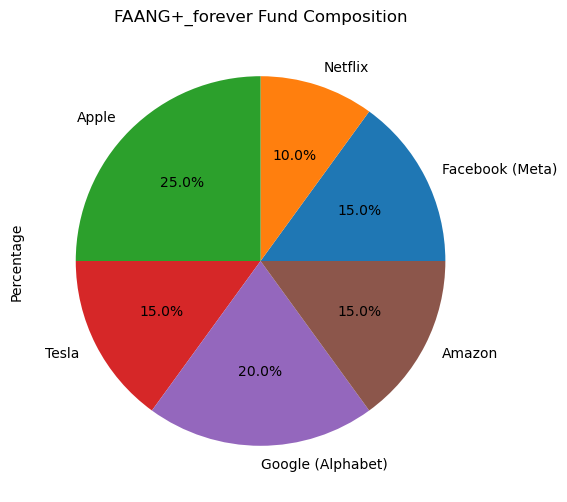

In [551]:
# Fund composition data
fund_df = pd.DataFrame({
    'Company': ['Facebook (Meta)', 'Netflix', 'Apple', 'Tesla', 'Google (Alphabet)', 'Amazon'],
    'Percentage': [0.15, 0.10, 0.25, 0.15, 0.20, 0.15],
    'Symbol': ['META', 'NFLX', 'AAPL', 'TSLA', 'GOOGL', 'AMZN']
})

# Plot the pie chart
fund_df.set_index('Company')['Percentage'].plot.pie(autopct='%1.1f%%', figsize=(8, 6), title='FAANG+_forever Fund Composition')

### 3. Quarter by Quarter Performance compared to SPX500

#### 3.1 Filter based on last date available for each quarter

In [555]:
last_dates_quarter = df.groupby(['Year', 'Quarter'])['Date'].max().reset_index()
last_dates_quarter = last_dates_quarter.iloc[:-1] # drop last row as not enough dates / not requested
last_dates_quarter

Year  Quarter       Date
0  2023        4 2023-12-29
1  2024        1 2024-03-28
2  2024        2 2024-06-28
3  2024        3 2024-09-30

In [557]:
filtered_df = df[df['Date'].isin(last_dates_quarter['Date'])].copy().reset_index(drop=True)
filtered_df

Date        Close Symbol Week  Quarter  Year
0  2023-12-29   191.802185   AAPL   52        4  2023
1  2024-03-28   171.049728   AAPL   13        1  2024
2  2024-06-28   210.376480   AAPL   26        2  2024
3  2024-09-30   233.000000   AAPL   40        3  2024
4  2023-12-29   151.940002   AMZN   52        4  2023
5  2024-03-28   180.380005   AMZN   13        1  2024
6  2024-06-28   193.250000   AMZN   26        2  2024
7  2024-09-30   186.330002   AMZN   40        3  2024
8  2023-12-29   139.344955  GOOGL   52        4  2023
9  2024-03-28   150.557190  GOOGL   13        1  2024
10 2024-06-28   181.908615  GOOGL   26        2  2024
11 2024-09-30   165.850006  GOOGL   40        3  2024
12 2023-12-29   352.897491   META   52        4  2023
13 2024-03-28   484.636017   META   13        1  2024
14 2024-06-28   503.739441   META   26        2  2024
15 2024-09-30   572.440002   META   40        3  2024
16 2023-12-29   486.880005   NFLX   52        4  2023
17 2024-03-28   607.330017   NFLX   13        1  2024
18 2024-06-28   674.880005   NFLX   26        2  2024
19 2024-09-30   709.270020   NFLX   40        3  2024
20 2023-12-29  4769.830078    SPX   52        4  2023
21 2024-03-28  5254.350098    SPX   13        1  2024
22 2024-06-28  5460.479980    SPX   26        2  2024
23 2024-09-30  5762.479980    SPX   40        3  2024
24 2023-12-29   248.479996   TSLA   52        4  2023
25 2024-03-28   175.789993   TSLA   13        1  2024
26 2024-06-28   197.880005   TSLA   26        2  2024
27 2024-09-30   261.630005   TSLA   40        3  2024

#### 3.2 Include data from previous period

In [560]:
filtered_df['Previous Period Date'] = filtered_df.groupby('Symbol')['Date'].shift(+1)
filtered_df['Previous Period Close'] = filtered_df.groupby('Symbol')['Close'].shift(+1)
filtered_df = filtered_df.dropna(subset=['Previous Period Close']).reset_index(drop=True)
filtered_df

Date        Close Symbol Week  Quarter  Year Previous Period Date  \
0  2024-03-28   171.049728   AAPL   13        1  2024           2023-12-29   
1  2024-06-28   210.376480   AAPL   26        2  2024           2024-03-28   
2  2024-09-30   233.000000   AAPL   40        3  2024           2024-06-28   
3  2024-03-28   180.380005   AMZN   13        1  2024           2023-12-29   
4  2024-06-28   193.250000   AMZN   26        2  2024           2024-03-28   
5  2024-09-30   186.330002   AMZN   40        3  2024           2024-06-28   
6  2024-03-28   150.557190  GOOGL   13        1  2024           2023-12-29   
7  2024-06-28   181.908615  GOOGL   26        2  2024           2024-03-28   
8  2024-09-30   165.850006  GOOGL   40        3  2024           2024-06-28   
9  2024-03-28   484.636017   META   13        1  2024           2023-12-29   
10 2024-06-28   503.739441   META   26        2  2024           2024-03-28   
11 2024-09-30   572.440002   META   40        3  2024           2024-06-28   
12 2024-03-28   607.330017   NFLX   13        1  2024           2023-12-29   
13 2024-06-28   674.880005   NFLX   26        2  2024           2024-03-28   
14 2024-09-30   709.270020   NFLX   40        3  2024           2024-06-28   
15 2024-03-28  5254.350098    SPX   13        1  2024           2023-12-29   
16 2024-06-28  5460.479980    SPX   26        2  2024           2024-03-28   
17 2024-09-30  5762.479980    SPX   40        3  2024           2024-06-28   
18 2024-03-28   175.789993   TSLA   13        1  2024           2023-12-29   
19 2024-06-28   197.880005   TSLA   26        2  2024           2024-03-28   
20 2024-09-30   261.630005   TSLA   40        3  2024           2024-06-28   

    Previous Period Close  
0              191.802185  
1              171.049728  
2              210.376480  
3              151.940002  
4              180.380005  
5              193.250000  
6              139.344955  
7              150.557190  
8              181.908615  
9              352.897491  
10             484.636017  
11             503.739441  
12             486.880005  
13             607.330017  
14             674.880005  
15            4769.830078  
16            5254.350098  
17            5460.479980  
18             248.479996  
19             175.789993  
20             197.880005

#### 3.3 Data Cleaning

In [563]:
filtered_df = filtered_df.drop(columns=['Date'])
filtered_df['Date'] = filtered_df['Year'].astype(str) + 'Q' + filtered_df['Quarter'].astype(str)
filtered_df = filtered_df.drop(columns=['Week','Quarter', 'Year', 'Previous Period Date'])
filtered_df

Close Symbol  Previous Period Close    Date
0    171.049728   AAPL             191.802185  2024Q1
1    210.376480   AAPL             171.049728  2024Q2
2    233.000000   AAPL             210.376480  2024Q3
3    180.380005   AMZN             151.940002  2024Q1
4    193.250000   AMZN             180.380005  2024Q2
5    186.330002   AMZN             193.250000  2024Q3
6    150.557190  GOOGL             139.344955  2024Q1
7    181.908615  GOOGL             150.557190  2024Q2
8    165.850006  GOOGL             181.908615  2024Q3
9    484.636017   META             352.897491  2024Q1
10   503.739441   META             484.636017  2024Q2
11   572.440002   META             503.739441  2024Q3
12   607.330017   NFLX             486.880005  2024Q1
13   674.880005   NFLX             607.330017  2024Q2
14   709.270020   NFLX             674.880005  2024Q3
15  5254.350098    SPX            4769.830078  2024Q1
16  5460.479980    SPX            5254.350098  2024Q2
17  5762.479980    SPX            5460.479980  2024Q3
18   175.789993   TSLA             248.479996  2024Q1
19   197.880005   TSLA             175.789993  2024Q2
20   261.630005   TSLA             197.880005  2024Q3

#### 3.4 Calculate Gain/Loss

In [566]:
filtered_df['Gain/Loss'] = filtered_df['Close'] - filtered_df['Previous Period Close']
filtered_df['Gain/Loss %'] = (filtered_df['Gain/Loss']/filtered_df['Previous Period Close']) * 100
filtered_df

Close Symbol  Previous Period Close    Date   Gain/Loss  Gain/Loss %
0    171.049728   AAPL             191.802185  2024Q1  -20.752457   -10.819719
1    210.376480   AAPL             171.049728  2024Q2   39.326752    22.991414
2    233.000000   AAPL             210.376480  2024Q3   22.623520    10.753826
3    180.380005   AMZN             151.940002  2024Q1   28.440002    18.717916
4    193.250000   AMZN             180.380005  2024Q2   12.869995     7.134934
5    186.330002   AMZN             193.250000  2024Q3   -6.919998    -3.580853
6    150.557190  GOOGL             139.344955  2024Q1   11.212234     8.046387
7    181.908615  GOOGL             150.557190  2024Q2   31.351425    20.823599
8    165.850006  GOOGL             181.908615  2024Q3  -16.058609    -8.827844
9    484.636017   META             352.897491  2024Q1  131.738525    37.330536
10   503.739441   META             484.636017  2024Q2   19.103424     3.941809
11   572.440002   META             503.739441  2024Q3   68.700562    13.638114
12   607.330017   NFLX             486.880005  2024Q1  120.450012    24.739158
13   674.880005   NFLX             607.330017  2024Q2   67.549988    11.122452
14   709.270020   NFLX             674.880005  2024Q3   34.390015     5.095723
15  5254.350098    SPX            4769.830078  2024Q1  484.520020    10.158014
16  5460.479980    SPX            5254.350098  2024Q2  206.129883     3.923033
17  5762.479980    SPX            5460.479980  2024Q3  302.000000     5.530649
18   175.789993   TSLA             248.479996  2024Q1  -72.690002   -29.253865
19   197.880005   TSLA             175.789993  2024Q2   22.090012    12.566137
20   261.630005   TSLA             197.880005  2024Q3   63.750000    32.216494

#### 3.5 Merge with Fund Composition and calculate Fund Gain/Loss %

In [569]:
#Drop unnecessary columns
filtered_df = filtered_df.drop(columns=['Close', 'Previous Period Close', 'Gain/Loss'])

In [571]:
merged_df = filtered_df.merge(fund_df, on='Symbol', how='left')
merged_df['Percentage'] = merged_df['Percentage'].fillna(1)
# Calculate 'Fund Gain/Loss %' and assign it to a new column
merged_df['Fund Gain/Loss %'] = merged_df['Gain/Loss %'] * merged_df['Percentage']
merged_df

Symbol    Date  Gain/Loss %            Company  Percentage  \
0    AAPL  2024Q1   -10.819719              Apple        0.25   
1    AAPL  2024Q2    22.991414              Apple        0.25   
2    AAPL  2024Q3    10.753826              Apple        0.25   
3    AMZN  2024Q1    18.717916             Amazon        0.15   
4    AMZN  2024Q2     7.134934             Amazon        0.15   
5    AMZN  2024Q3    -3.580853             Amazon        0.15   
6   GOOGL  2024Q1     8.046387  Google (Alphabet)        0.20   
7   GOOGL  2024Q2    20.823599  Google (Alphabet)        0.20   
8   GOOGL  2024Q3    -8.827844  Google (Alphabet)        0.20   
9    META  2024Q1    37.330536    Facebook (Meta)        0.15   
10   META  2024Q2     3.941809    Facebook (Meta)        0.15   
11   META  2024Q3    13.638114    Facebook (Meta)        0.15   
12   NFLX  2024Q1    24.739158            Netflix        0.10   
13   NFLX  2024Q2    11.122452            Netflix        0.10   
14   NFLX  2024Q3     5.095723            Netflix        0.10   
15    SPX  2024Q1    10.158014                NaN        1.00   
16    SPX  2024Q2     3.923033                NaN        1.00   
17    SPX  2024Q3     5.530649                NaN        1.00   
18   TSLA  2024Q1   -29.253865              Tesla        0.15   
19   TSLA  2024Q2    12.566137              Tesla        0.15   
20   TSLA  2024Q3    32.216494              Tesla        0.15   

    Fund Gain/Loss %  
0          -2.704930  
1           5.747854  
2           2.688456  
3           2.807687  
4           1.070240  
5          -0.537128  
6           1.609277  
7           4.164720  
8          -1.765569  
9           5.599580  
10          0.591271  
11          2.045717  
12          2.473916  
13          1.112245  
14          0.509572  
15         10.158014  
16          3.923033  
17          5.530649  
18         -4.388080  
19          1.884921  
20          4.832474

#### 3.6 Fund results excluding SPX

In [574]:
# Drop unneccessary columns
merged_df = merged_df.drop(columns=['Gain/Loss %', 'Company', 'Percentage'])

In [576]:
# Only take Symbols without SPX
fund_no_spx_df = merged_df[merged_df['Symbol'] != 'SPX']

In [578]:
fund_result_df = fund_no_spx_df.groupby(fund_no_spx_df.Date)['Fund Gain/Loss %'].sum().reset_index()
fund_result_df

Date  Fund Gain/Loss %
0  2024Q1          5.397452
1  2024Q2         14.571251
2  2024Q3          7.773523

#### 3.7 SPX results

In [581]:
spx_df = merged_df[merged_df['Symbol'] == 'SPX']
spx_df = spx_df.drop(columns=['Symbol'])
spx_df = spx_df.rename(columns={'Fund Gain/Loss %': 'SPX Gain/Loss %'})
spx_df

Date  SPX Gain/Loss %
15  2024Q1        10.158014
16  2024Q2         3.923033
17  2024Q3         5.530649

#### 3.8 Merged results

In [584]:
#Merge
merged_fund_df = pd.merge(fund_result_df, spx_df, on='Date', how='outer')
merged_fund_df = merged_fund_df.set_index('Date')

In [586]:
#Calculate performance against SPX
merged_fund_df['Performance'] = merged_fund_df['Fund Gain/Loss %'] - merged_fund_df['SPX Gain/Loss %']
merged_fund_df = merged_fund_df.round(1)
merged_fund_df

Fund Gain/Loss %  SPX Gain/Loss %  Performance
Date                                                  
2024Q1               5.4             10.2         -4.8
2024Q2              14.6              3.9         10.6
2024Q3               7.8              5.5          2.2

#### 3.9 Final Result: Quarter by Quarter Performance ---------------------------------------------------------------------------------------

In [589]:
#Function for Performance column
def performance_text(row):
    if row['Performance'] > 0:
        return f'The fund performed {row['Performance']:.1f}% above the market'
    elif row['Performance'] < 0:
        return f'The fund performed {row['Performance']:.1f}% below the market'
    else:
        return 'The fund performed as the market'

In [591]:
merged_fund_df['Fund vs SPX %'] = merged_fund_df.apply(performance_text, axis=1)
merged_fund_df

Fund Gain/Loss %  SPX Gain/Loss %  Performance  \
Date                                                     
2024Q1               5.4             10.2         -4.8   
2024Q2              14.6              3.9         10.6   
2024Q3               7.8              5.5          2.2   

                                    Fund vs SPX %  
Date                                               
2024Q1  The fund performed -4.8% below the market  
2024Q2  The fund performed 10.6% above the market  
2024Q3   The fund performed 2.2% above the market

### 4. Weekly Performance compared to SPX500

#### 4.1 Filter based on last date available for each week

In [595]:
last_dates_week = df.groupby(['Year', 'Week'])['Date'].max().reset_index()
last_dates_week = last_dates_week.iloc[:-1] # drop last row as not enough days to fill the week
last_dates_week

Year Week       Date
0   2023   48 2023-12-01
1   2023   49 2023-12-08
2   2023   50 2023-12-15
3   2023   51 2023-12-22
4   2023   52 2023-12-29
5   2024   01 2024-01-05
6   2024   02 2024-01-12
7   2024   03 2024-01-19
8   2024   04 2024-01-26
9   2024   05 2024-02-02
10  2024   06 2024-02-09
11  2024   07 2024-02-16
12  2024   08 2024-02-23
13  2024   09 2024-03-01
14  2024   10 2024-03-08
15  2024   11 2024-03-15
16  2024   12 2024-03-22
17  2024   13 2024-03-28
18  2024   14 2024-04-05
19  2024   15 2024-04-12
20  2024   16 2024-04-19
21  2024   17 2024-04-26
22  2024   18 2024-05-03
23  2024   19 2024-05-10
24  2024   20 2024-05-17
25  2024   21 2024-05-24
26  2024   22 2024-05-31
27  2024   23 2024-06-07
28  2024   24 2024-06-14
29  2024   25 2024-06-21
30  2024   26 2024-06-28
31  2024   27 2024-07-05
32  2024   28 2024-07-12
33  2024   29 2024-07-19
34  2024   30 2024-07-26
35  2024   31 2024-08-02
36  2024   32 2024-08-09
37  2024   33 2024-08-16
38  2024   34 2024-08-23
39  2024   35 2024-08-30
40  2024   36 2024-09-06
41  2024   37 2024-09-13
42  2024   38 2024-09-20
43  2024   39 2024-09-27
44  2024   40 2024-10-04
45  2024   41 2024-10-11
46  2024   42 2024-10-18

In [597]:
weeks_df = df[df['Date'].isin(last_dates_week['Date'])].copy().reset_index(drop=True)
weeks_df

Date       Close Symbol Week  Quarter  Year
0   2023-12-01  190.517059   AAPL   48        4  2023
1   2023-12-08  194.970154   AAPL   49        4  2023
2   2023-12-15  196.823120   AAPL   50        4  2023
3   2023-12-22  192.868134   AAPL   51        4  2023
4   2023-12-29  191.802185   AAPL   52        4  2023
..         ...         ...    ...  ...      ...   ...
324 2024-09-20  238.250000   TSLA   38        3  2024
325 2024-09-27  260.459991   TSLA   39        3  2024
326 2024-10-04  250.080002   TSLA   40        4  2024
327 2024-10-11  217.800003   TSLA   41        4  2024
328 2024-10-18  220.699997   TSLA   42        4  2024

[329 rows x 6 columns]

#### 4.2 Include data from previous period

In [600]:
weeks_df['Previous Period Date'] = weeks_df.groupby('Symbol')['Date'].shift(+1)
weeks_df['Previous Period Close'] = weeks_df.groupby('Symbol')['Close'].shift(+1)
weeks_df = weeks_df.dropna(subset=['Previous Period Close']).reset_index(drop=True)
weeks_df

Date       Close Symbol Week  Quarter  Year Previous Period Date  \
0   2023-12-08  194.970154   AAPL   49        4  2023           2023-12-01   
1   2023-12-15  196.823120   AAPL   50        4  2023           2023-12-08   
2   2023-12-22  192.868134   AAPL   51        4  2023           2023-12-15   
3   2023-12-29  191.802185   AAPL   52        4  2023           2023-12-22   
4   2024-01-05  180.495071   AAPL   01        1  2024           2023-12-29   
..         ...         ...    ...  ...      ...   ...                  ...   
317 2024-09-20  238.250000   TSLA   38        3  2024           2024-09-13   
318 2024-09-27  260.459991   TSLA   39        3  2024           2024-09-20   
319 2024-10-04  250.080002   TSLA   40        4  2024           2024-09-27   
320 2024-10-11  217.800003   TSLA   41        4  2024           2024-10-04   
321 2024-10-18  220.699997   TSLA   42        4  2024           2024-10-11   

     Previous Period Close  
0               190.517059  
1               194.970154  
2               196.823120  
3               192.868134  
4               191.802185  
..                     ...  
317             230.289993  
318             238.250000  
319             260.459991  
320             250.080002  
321             217.800003  

[322 rows x 8 columns]

#### 4.3 Data Cleaning

In [603]:
weeks_df = weeks_df.drop(columns=['Date'])
weeks_df['Date'] = weeks_df['Year'].astype(str) + 'W' + weeks_df['Week'].astype(str)
weeks_df = weeks_df.drop(columns=['Week','Quarter', 'Year', 'Previous Period Date'])
weeks_df

Close Symbol  Previous Period Close     Date
0    194.970154   AAPL             190.517059  2023W49
1    196.823120   AAPL             194.970154  2023W50
2    192.868134   AAPL             196.823120  2023W51
3    191.802185   AAPL             192.868134  2023W52
4    180.495071   AAPL             191.802185  2024W01
..          ...    ...                    ...      ...
317  238.250000   TSLA             230.289993  2024W38
318  260.459991   TSLA             238.250000  2024W39
319  250.080002   TSLA             260.459991  2024W40
320  217.800003   TSLA             250.080002  2024W41
321  220.699997   TSLA             217.800003  2024W42

[322 rows x 4 columns]

#### 4.4 Calculate Gain/Loss

In [606]:
weeks_df['Gain/Loss'] = weeks_df['Close'] - weeks_df['Previous Period Close']
weeks_df['Gain/Loss %'] = (weeks_df['Gain/Loss']/weeks_df['Previous Period Close']) * 100
weeks_df

Close Symbol  Previous Period Close     Date  Gain/Loss  Gain/Loss %
0    194.970154   AAPL             190.517059  2023W49   4.453094     2.337373
1    196.823120   AAPL             194.970154  2023W50   1.852966     0.950385
2    192.868134   AAPL             196.823120  2023W51  -3.954987    -2.009412
3    191.802185   AAPL             192.868134  2023W52  -1.065948    -0.552683
4    180.495071   AAPL             191.802185  2024W01 -11.307114    -5.895195
..          ...    ...                    ...      ...        ...          ...
317  238.250000   TSLA             230.289993  2024W38   7.960007     3.456514
318  260.459991   TSLA             238.250000  2024W39  22.209991     9.322137
319  250.080002   TSLA             260.459991  2024W40 -10.379990    -3.985253
320  217.800003   TSLA             250.080002  2024W41 -32.279999   -12.907869
321  220.699997   TSLA             217.800003  2024W42   2.899994     1.331494

[322 rows x 6 columns]

#### 4.5 Merge with Fund Composition and calculate Fund Gain/Loss %

In [609]:
#Drop unnecessary columns
weeks_df = weeks_df.drop(columns=['Close', 'Previous Period Close', 'Gain/Loss'])

In [611]:
merged_weeks_df = weeks_df.merge(fund_df, on='Symbol', how='left')
merged_weeks_df['Percentage'] = merged_weeks_df['Percentage'].fillna(1)
# Calculate 'Fund Gain/Loss %' and assign it to a new column
merged_weeks_df['Fund Gain/Loss %'] = merged_weeks_df['Gain/Loss %'] * merged_weeks_df['Percentage']
merged_weeks_df

Symbol     Date  Gain/Loss % Company  Percentage  Fund Gain/Loss %
0     AAPL  2023W49     2.337373   Apple        0.25          0.584343
1     AAPL  2023W50     0.950385   Apple        0.25          0.237596
2     AAPL  2023W51    -2.009412   Apple        0.25         -0.502353
3     AAPL  2023W52    -0.552683   Apple        0.25         -0.138171
4     AAPL  2024W01    -5.895195   Apple        0.25         -1.473799
..     ...      ...          ...     ...         ...               ...
317   TSLA  2024W38     3.456514   Tesla        0.15          0.518477
318   TSLA  2024W39     9.322137   Tesla        0.15          1.398321
319   TSLA  2024W40    -3.985253   Tesla        0.15         -0.597788
320   TSLA  2024W41   -12.907869   Tesla        0.15         -1.936180
321   TSLA  2024W42     1.331494   Tesla        0.15          0.199724

[322 rows x 6 columns]

#### 4.6 Fund results excluding SPX

In [614]:
# Drop unneccessary columns
merged_weeks_df = merged_weeks_df.drop(columns=['Gain/Loss %', 'Company', 'Percentage'])

In [616]:
# Only take Symbols without SPX
fund_no_spx_weeks_df = merged_weeks_df[merged_weeks_df['Symbol'] != 'SPX']

In [618]:
fund_result_weeks_df = fund_no_spx_weeks_df.groupby(fund_no_spx_weeks_df.Date)['Fund Gain/Loss %'].sum().reset_index()
fund_result_weeks_df

Date  Fund Gain/Loss %
0   2023W49          1.522512
1   2023W50          1.238321
2   2023W51          2.265398
3   2023W52         -0.751796
4   2024W01         -3.714135
5   2024W02          2.810125
6   2024W03          1.063822
7   2024W04          1.454593
8   2024W05          2.410559
9   2024W06          1.772107
10  2024W07         -1.364289
11  2024W08          0.753698
12  2024W09          0.950686
13  2024W10         -3.882744
14  2024W11         -0.587745
15  2024W12          3.512535
16  2024W13         -0.568476
17  2024W14          1.156858
18  2024W15          1.709751
19  2024W16         -7.120301
20  2024W17          4.498398
21  2024W18          3.847504
22  2024W19          0.555478
23  2024W20          2.420534
24  2024W21          0.336146
25  2024W22         -0.877209
26  2024W23          2.285566
27  2024W24          3.055000
28  2024W25          0.568019
29  2024W26          2.329666
30  2024W27          8.679170
31  2024W28         -2.489342
32  2024W29         -3.782262
33  2024W30         -3.555931
34  2024W31         -1.408622
35  2024W32         -0.168896
36  2024W33          4.108541
37  2024W34          0.907949
38  2024W35         -0.308699
39  2024W36         -4.365271
40  2024W37          4.998513
41  2024W38          3.471003
42  2024W39          1.363977
43  2024W40          0.486637
44  2024W41         -2.232882
45  2024W42          1.279671

#### 4.7 SPX results

In [621]:
spx_weeks_df = merged_weeks_df[merged_weeks_df['Symbol'] == 'SPX']
spx_weeks_df = spx_weeks_df.drop(columns=['Symbol'])
spx_weeks_df = spx_weeks_df.rename(columns={'Fund Gain/Loss %': 'SPX Gain/Loss %'})
spx_weeks_df

Date  SPX Gain/Loss %
230  2023W49         0.211992
231  2023W50         2.493714
232  2023W51         0.750975
233  2023W52         0.319693
234  2024W01        -1.521854
235  2024W02         1.843420
236  2024W03         1.170192
237  2024W04         1.057070
238  2024W05         1.382950
239  2024W06         1.371352
240  2024W07        -0.418573
241  2024W08         1.662747
242  2024W09         0.948756
243  2024W10        -0.260657
244  2024W11        -0.128815
245  2024W12         2.288221
246  2024W13         0.385350
247  2024W14        -0.951788
248  2024W15        -1.555042
249  2024W16        -3.048364
250  2024W17         2.672113
251  2024W18         0.545692
252  2024W19         1.850507
253  2024W20         1.543074
254  2024W21         0.027345
255  2024W22        -0.512948
256  2024W23         1.316539
257  2024W24         1.582383
258  2024W25         0.607924
259  2024W26        -0.075763
260  2024W27         1.954223
261  2024W28         0.865071
262  2024W29        -1.965151
263  2024W30        -0.833786
264  2024W31        -2.061513
265  2024W32        -0.044887
266  2024W33         3.931204
267  2024W34         1.446818
268  2024W35         0.244738
269  2024W36        -4.248637
270  2024W37         4.023358
271  2024W38         1.360283
272  2024W39         0.624635
273  2024W40         0.224809
274  2024W41         1.112140
275  2024W42         0.853652

#### 4.8 Final Result: Line chart with weekly gain/loss % of the fund and SPX ---------------------------------------------------------------

In [624]:
#Merge
merged_fund_weeks_df = pd.merge(fund_result_weeks_df, spx_weeks_df, on='Date', how='outer')
merged_fund_weeks_df = merged_fund_weeks_df.set_index('Date')
merged_fund_weeks_df.round(1)

Fund Gain/Loss %  SPX Gain/Loss %
Date                                      
2023W49               1.5              0.2
2023W50               1.2              2.5
2023W51               2.3              0.8
2023W52              -0.8              0.3
2024W01              -3.7             -1.5
2024W02               2.8              1.8
2024W03               1.1              1.2
2024W04               1.5              1.1
2024W05               2.4              1.4
2024W06               1.8              1.4
2024W07              -1.4             -0.4
2024W08               0.8              1.7
2024W09               1.0              0.9
2024W10              -3.9             -0.3
2024W11              -0.6             -0.1
2024W12               3.5              2.3
2024W13              -0.6              0.4
2024W14               1.2             -1.0
2024W15               1.7             -1.6
2024W16              -7.1             -3.0
2024W17               4.5              2.7
2024W18               3.8              0.5
2024W19               0.6              1.9
2024W20               2.4              1.5
2024W21               0.3              0.0
2024W22              -0.9             -0.5
2024W23               2.3              1.3
2024W24               3.1              1.6
2024W25               0.6              0.6
2024W26               2.3             -0.1
2024W27               8.7              2.0
2024W28              -2.5              0.9
2024W29              -3.8             -2.0
2024W30              -3.6             -0.8
2024W31              -1.4             -2.1
2024W32              -0.2             -0.0
2024W33               4.1              3.9
2024W34               0.9              1.4
2024W35              -0.3              0.2
2024W36              -4.4             -4.2
2024W37               5.0              4.0
2024W38               3.5              1.4
2024W39               1.4              0.6
2024W40               0.5              0.2
2024W41              -2.2              1.1
2024W42               1.3              0.9

<Axes: title={'center': 'Weekly Gain/Loss % of Fund and SPX'}, xlabel='Date', ylabel='Weekly Gain/Loss %'>

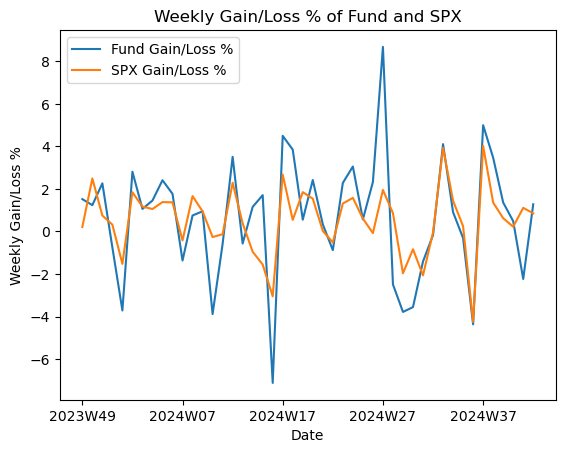

In [626]:
# Plot 1: Weekly Gain/Loss %
merged_fund_weeks_df[['Fund Gain/Loss %', 'SPX Gain/Loss %']].plot(title='Weekly Gain/Loss % of Fund and SPX', ylabel='Weekly Gain/Loss %')

#### 4.9 Final Result: Line chart with weekly acummulated gain/loss % of the fund and SPX ---------------------------------------------------

In [629]:
# Calculate cumulative growth factor for Gain/Loss % (as percentage)
merged_fund_weeks_cumulative_df = ((1 + merged_fund_weeks_df/100).cumprod() - 1)*100
merged_fund_weeks_cumulative_df.round(1)

Fund Gain/Loss %  SPX Gain/Loss %
Date                                      
2023W49               1.5              0.2
2023W50               2.8              2.7
2023W51               5.1              3.5
2023W52               4.3              3.8
2024W01               0.4              2.2
2024W02               3.3              4.1
2024W03               4.4              5.3
2024W04               5.9              6.4
2024W05               8.4              7.9
2024W06              10.4              9.4
2024W07               8.9              8.9
2024W08               9.7             10.8
2024W09              10.7             11.8
2024W10               6.4             11.5
2024W11               5.8             11.4
2024W12               9.5             13.9
2024W13               8.9             14.4
2024W14              10.1             13.3
2024W15              12.0             11.5
2024W16               4.0              8.1
2024W17               8.7             11.0
2024W18              12.9             11.6
2024W19              13.5             13.7
2024W20              16.3             15.4
2024W21              16.7             15.5
2024W22              15.7             14.9
2024W23              18.3             16.4
2024W24              21.9             18.2
2024W25              22.6             18.9
2024W26              25.5             18.8
2024W27              36.4             21.2
2024W28              33.0             22.2
2024W29              27.9             19.8
2024W30              23.4             18.8
2024W31              21.6             16.4
2024W32              21.4             16.3
2024W33              26.4             20.9
2024W34              27.6             22.6
2024W35              27.2             22.9
2024W36              21.6             17.7
2024W37              27.7             22.4
2024W38              32.1             24.1
2024W39              33.9             24.9
2024W40              34.6             25.2
2024W41              31.6             26.6
2024W42              33.3             27.6

<Axes: title={'center': 'Accumulated Gain/Loss % of Fund and SPX'}, xlabel='Date', ylabel='Accumulated Gain/Loss %'>

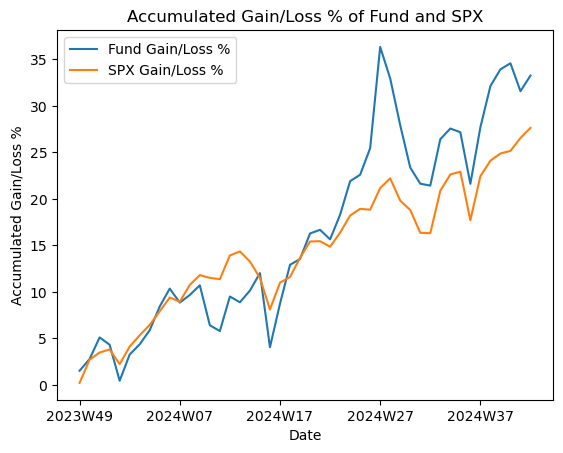

In [631]:
# Plot 2: Accumulated Gain/Loss %
merged_fund_weeks_cumulative_df[['Fund Gain/Loss %', 'SPX Gain/Loss %']].plot(title='Accumulated Gain/Loss % of Fund and SPX', ylabel='Accumulated Gain/Loss %')